In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

In [440]:
df=pd.read_csv('Mall_Customers.csv')

In [441]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [442]:
df.duplicated().sum()

np.int64(0)

In [443]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [445]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


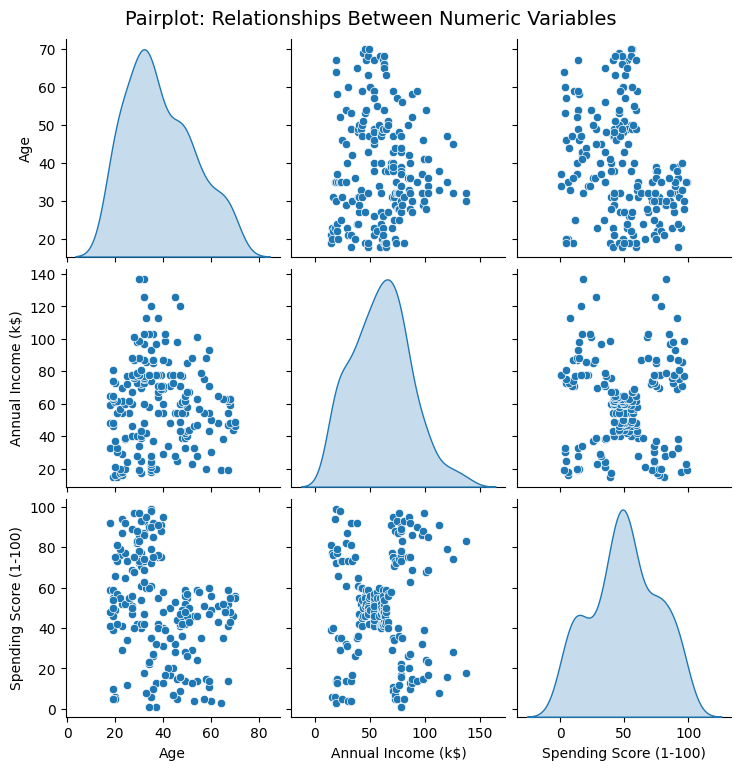

In [446]:

fig=sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
fig.fig.suptitle('Pairplot: Relationships Between Numeric Variables', y=1.02, fontsize=14)
plt.show()


In [447]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})



In [448]:
df = df.drop(columns=['CustomerID'])

In [449]:
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 25, 40, 60, 100], 
                         labels=[1, 2, 3, 4])

df['Income_to_Spending'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']

In [450]:
X = df[[ 'Age_Group','Annual Income (k$)', 'Spending Score (1-100)','Income_to_Spending']]
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0, 10))
X_scaled = scaler.fit_transform(X)

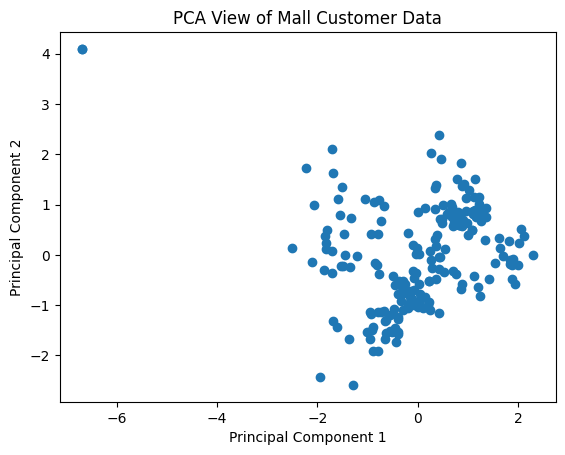

In [451]:
# Optional: 2D PCA view before clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA View of Mall Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [452]:
# Fit K-Means and Assign Cluster Labels
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the dataset
df['Cluster'] = kmeans.labels_


In [453]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_to_Spending,Cluster
0,1,19,15,39,1,0.384615,2
1,1,21,15,81,1,0.185185,2
2,0,20,16,6,1,2.666667,2
3,0,23,16,77,1,0.207792,2
4,0,31,17,40,2,0.425000,2
...,...,...,...,...,...,...,...
195,0,35,120,79,2,1.518987,4
196,0,45,126,28,3,4.500000,3
197,1,32,126,74,2,1.702703,4
198,1,32,137,18,2,7.611111,3


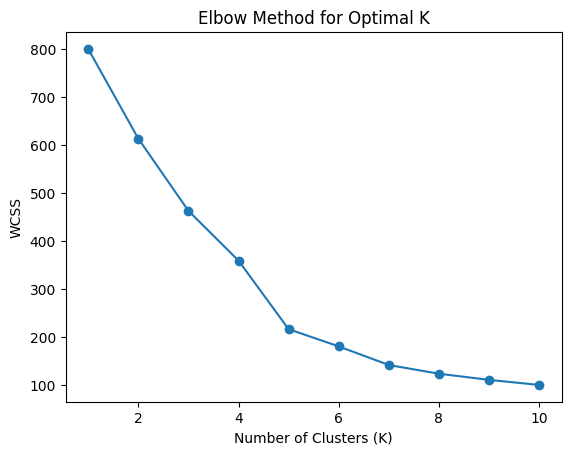

In [454]:
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


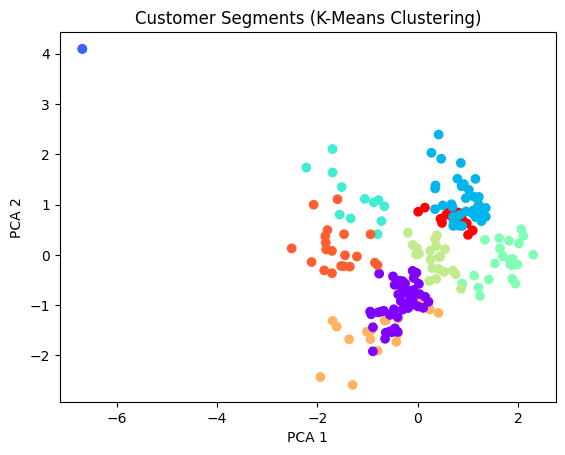

In [461]:
# Reduce to 2D for visualization (if not already)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=9, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='rainbow')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [462]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.439


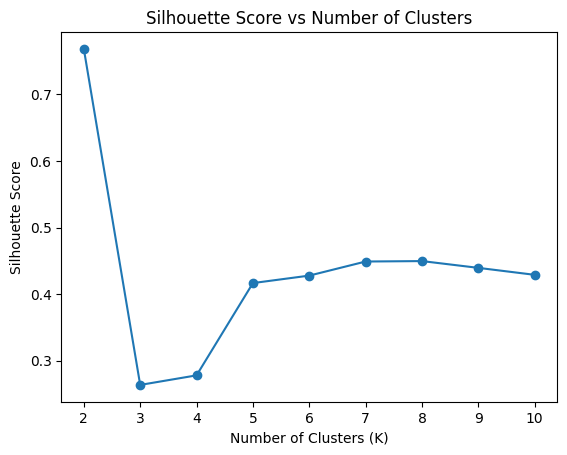

In [457]:
# Confirming the best K
from sklearn.metrics import silhouette_score
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()
